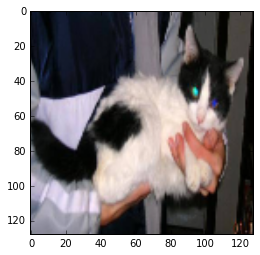

test image:/notebooks/CNNcatdogs/imagenes/test/14.jpg
results[[0.09487934 0.9051206 ]]
Es un gato


In [2]:
import tensorflow as tf
import numpy as np
import os,glob,cv2
import sys,argparse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


# First, pass the path of the image
rutaDeDatosDeEntrenamiento=os.path.join(os.path.realpath('.'),'imagenes/test')
imageName = "14.jpg"
filename = rutaDeDatosDeEntrenamiento +'/' +imageName
image_size=128
num_channels=3
images = []
# Reading the image using OpenCV
image = cv2.imread(filename)
# Resizing the image to our desired size and preprocessing will be done exactly as done during training
image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
images.append(image)
images = np.array(images, dtype=np.uint8)
images = images.astype('float64')
images = np.multiply(images, 1.0/255.0) 
#The input to the network is of shape [None image_size image_size num_channels]. Hence we reshape.
x_batch = images.reshape(1, image_size,image_size,num_channels)

plt.imshow(images[0])
plt.show()

## Let us restore the saved model 
sess = tf.Session()
# Step-1: Recreate the network graph. At this step only graph is created.
# saver = tf.train.import_meta_graph('/notebooks/CNNcatdogs/model/original/dogs-cats-model.meta')
saver = tf.train.import_meta_graph('./model/codigoOriginal/dogs-cats-model_16_04_2018_v.1.meta')
# Step-2: Now let's load the weights saved using the restore method.
#saver.restore(sess, tf.train.latest_checkpoint('./model/original'))
saver.restore(sess, tf.train.latest_checkpoint('./model/codigoOriginal'))

# Accessing the default graph which we have restored
graph = tf.get_default_graph()

# Now, let's get hold of the op that we can be processed to get the output.
# In the original network y_pred is the tensor that is the prediction of the network
y_pred = graph.get_tensor_by_name("y_pred:0")

## Let's feed the images to the input placeholders
x= graph.get_tensor_by_name("x:0") 
y_true = graph.get_tensor_by_name("y_true:0") 
y_test_images = np.zeros((1, 2)) 


### Creating the feed_dict that is required to be fed to calculate y_pred 
feed_dict_testing = {x: x_batch, y_true: y_test_images}
result=sess.run(y_pred, feed_dict=feed_dict_testing)

print("test image:"+str(filename))
# result is of this format [probabiliy_of_rose probability_of_sunflower]
print("results"+str(result))
results = result[0]
if(results[0]>results[1]):
    print("Es un perro")
else:
    print("Es un gato")

